In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

True


device(type='cuda')

In [2]:
import torch

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")
print(f"How many devices {torch.cuda.device_count()}")


Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device:0
Name of current CUDA device: NVIDIA GeForce RTX 4060
How many devices 1


In [3]:
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                ])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
y = datasets.ImageFolder('./datasets/y/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
y_dataloader = torch.utils.data.DataLoader(y,
                                           batch_size=16,
                                           shuffle=False)
X_batched_data = iter(X_dataloader)
y_batched_data = iter(y_dataloader)

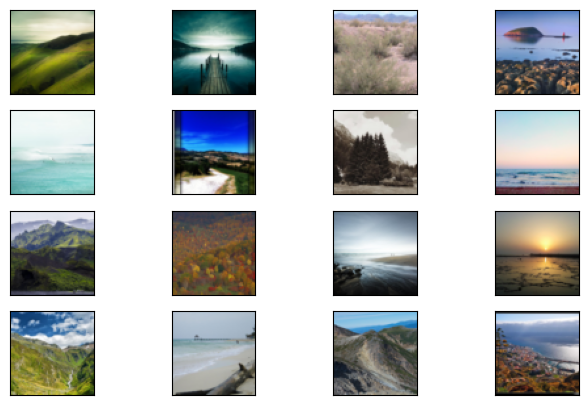

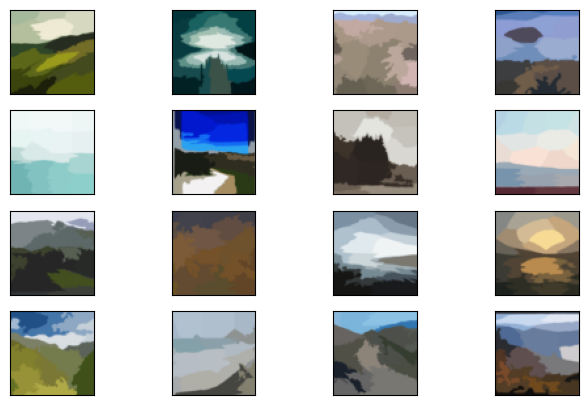

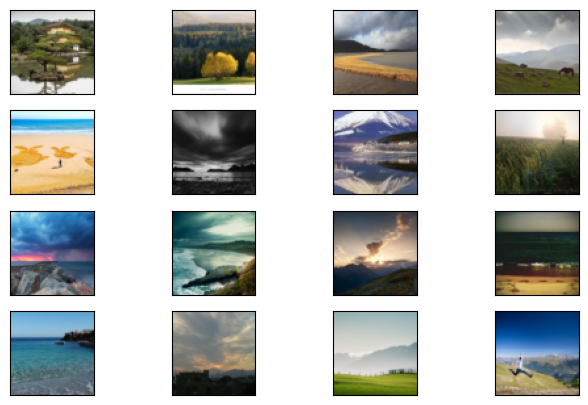

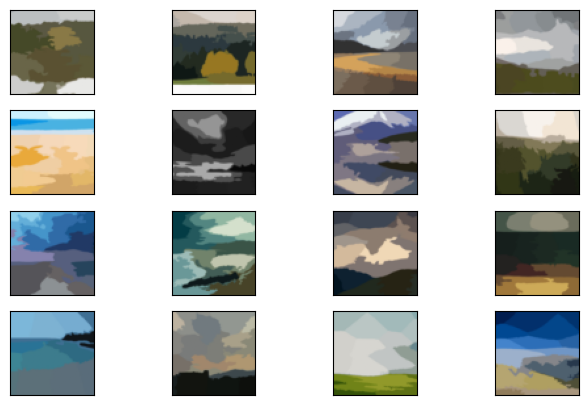

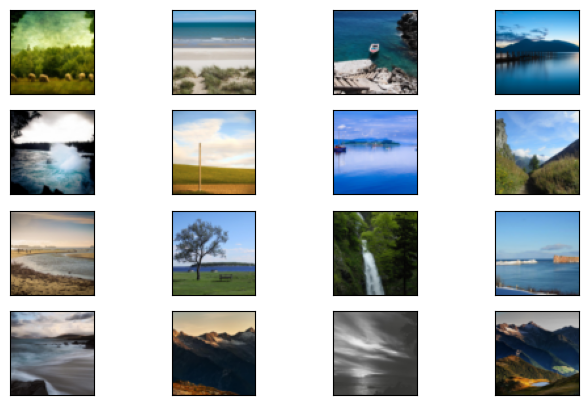

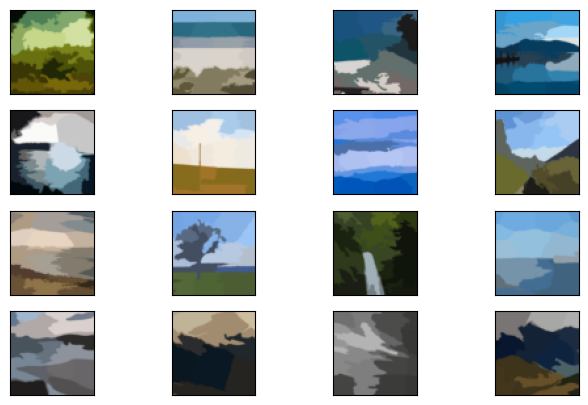

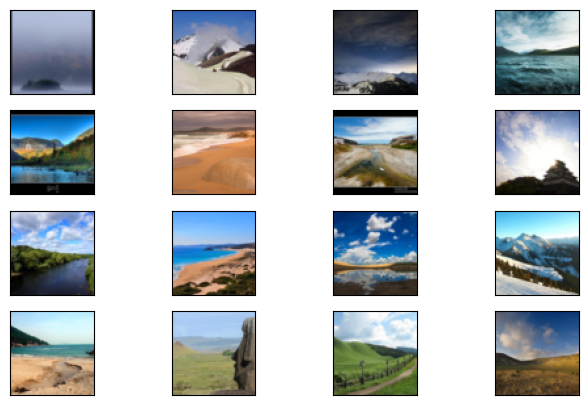

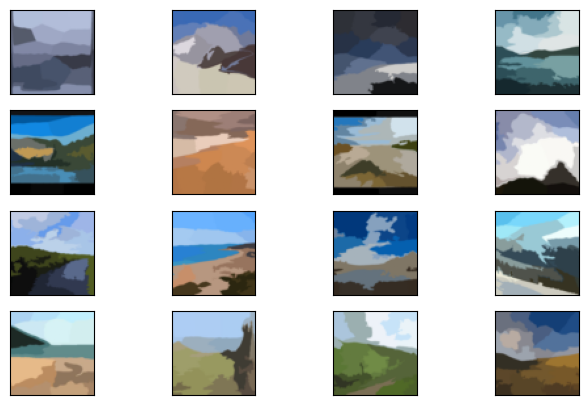

In [4]:
batch = 0
for e, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 5),  #Размер вывода
                             subplot_kw={'xticks': [], 'yticks': []})
    img_indx = 0
    for i, ax in enumerate(axes):
        for count in range(4):
            ax[count].imshow(real[img_indx].detach().numpy().transpose((1, 2, 0)))
            img_indx += 1
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 5),  #Размер вывода
                             subplot_kw={'xticks': [], 'yticks': []})
    img_indx = 0
    for i, ax in enumerate(axes):
        for count in range(4):
            ax[count].imshow(noises[img_indx].detach().numpy().transpose((1, 2, 0)))
            img_indx += 1
    batch += 1
    if batch == 4:
        break

In [5]:
X = next(X_batched_data)[0]
y = next(y_batched_data)[0]

In [6]:
X.size()

torch.Size([16, 3, 64, 64])

In [7]:
y.size()

torch.Size([16, 3, 64, 64])

In [8]:
X

tensor([[[[0.6471, 0.6471, 0.6471,  ..., 0.8392, 0.8392, 0.8392],
          [0.6471, 0.6471, 0.6471,  ..., 0.8392, 0.8392, 0.8392],
          [0.6471, 0.6471, 0.6471,  ..., 0.8392, 0.8392, 0.8392],
          ...,
          [0.2314, 0.2314, 0.2314,  ..., 0.3294, 0.3294, 0.3294],
          [0.2118, 0.2118, 0.2000,  ..., 0.3294, 0.3294, 0.3294],
          [0.1216, 0.1216, 0.1176,  ..., 0.3294, 0.3294, 0.3294]],

         [[0.7294, 0.7294, 0.7294,  ..., 0.8471, 0.8471, 0.8471],
          [0.7294, 0.7294, 0.7294,  ..., 0.8471, 0.8471, 0.8471],
          [0.7294, 0.7294, 0.7294,  ..., 0.8471, 0.8471, 0.8471],
          ...,
          [0.2667, 0.2667, 0.2667,  ..., 0.3647, 0.3647, 0.3647],
          [0.2392, 0.2392, 0.2314,  ..., 0.3647, 0.3647, 0.3647],
          [0.1373, 0.1333, 0.1294,  ..., 0.3647, 0.3647, 0.3647]],

         [[0.6078, 0.6078, 0.6078,  ..., 0.7529, 0.7529, 0.7529],
          [0.6078, 0.6078, 0.6078,  ..., 0.7529, 0.7529, 0.7529],
          [0.6078, 0.6078, 0.6078,  ..., 0

In [9]:
y

tensor([[[[0.4902, 0.5098, 0.5373,  ..., 0.5608, 0.5294, 0.5098],
          [0.4941, 0.5176, 0.5412,  ..., 0.6039, 0.5686, 0.5412],
          [0.5059, 0.5294, 0.5529,  ..., 0.6510, 0.6196, 0.5961],
          ...,
          [0.2196, 0.2314, 0.2275,  ..., 0.3490, 0.3686, 0.3961],
          [0.2078, 0.2039, 0.1961,  ..., 0.3765, 0.3255, 0.3647],
          [0.0902, 0.1059, 0.1176,  ..., 0.3922, 0.3647, 0.3804]],

         [[0.6000, 0.6196, 0.6392,  ..., 0.6549, 0.6275, 0.6078],
          [0.6039, 0.6196, 0.6431,  ..., 0.6941, 0.6627, 0.6431],
          [0.6157, 0.6353, 0.6549,  ..., 0.7255, 0.7020, 0.6824],
          ...,
          [0.2471, 0.2510, 0.2431,  ..., 0.4118, 0.4157, 0.4471],
          [0.2275, 0.2196, 0.2118,  ..., 0.4392, 0.3961, 0.4353],
          [0.1059, 0.1216, 0.1373,  ..., 0.4431, 0.4275, 0.4392]],

         [[0.5098, 0.5216, 0.5373,  ..., 0.5608, 0.5373, 0.5176],
          [0.5098, 0.5216, 0.5373,  ..., 0.5922, 0.5686, 0.5451],
          [0.5176, 0.5294, 0.5490,  ..., 0

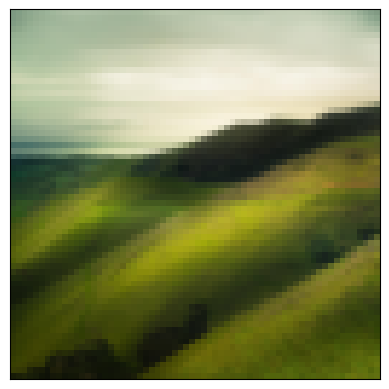

In [10]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', length=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.imshow(y[0].numpy().transpose((1, 2, 0)))

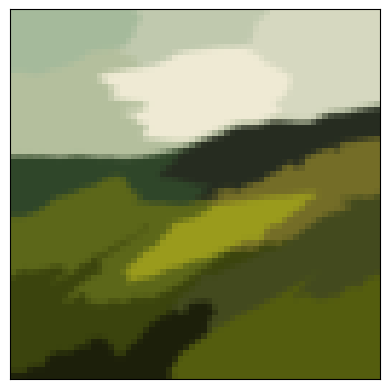

In [11]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', length=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.imshow(X[0].numpy().transpose((1, 2, 0)))

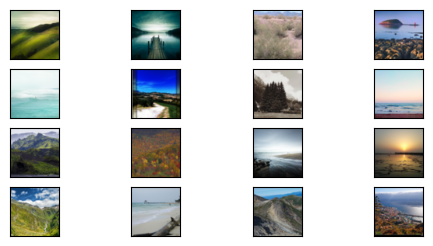

In [12]:
plt.figure(figsize=(6, 6))
for n, img in enumerate(y):
    ax = plt.subplot(8, 4, n + 1)

    ax.imshow(img.numpy().transpose((1, 2, 0)))
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels("")
    ax.set_yticklabels("")

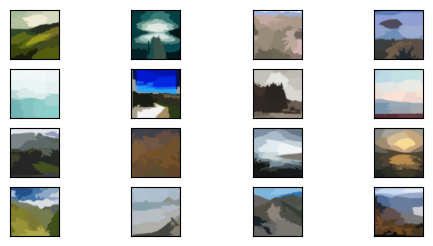

In [13]:
plt.figure(figsize=(6, 6))
for n, img in enumerate(X):
    ax = plt.subplot(8, 4, n + 1)

    ax.imshow(img.numpy().transpose((1, 2, 0)))
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels("")
    ax.set_yticklabels("")

In [35]:
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.Normalize(mean=0.5, std=0.5),
                                ])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
y = datasets.ImageFolder('./datasets/y/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=64,
                                           shuffle=False)
y_dataloader = torch.utils.data.DataLoader(y,
                                           batch_size=64,
                                           shuffle=False)

In [36]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()

        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=18,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          #nn.BatchNorm2d(9),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=18,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1,
                                                          padding=2),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          256,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))
        self.layer5 = torch.nn.Sequential(torch.nn.Conv2d(256,
                                                          512,
                                                          kernel_size=3,
                                                          stride=2,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(512, 1024)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(1024, 2048)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(2048, 3 * 64 * 64)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(-1, 512 * 1 * 1)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = self.ac_end(x)
        x = x.view(-1, 3, 64, 64)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(3 * 64 * 64, 256),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(256, 128),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(128, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(300):
    for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
        noise = noises.to(device)#torch.rand(real.shape).to(device) 
        I_img = I(noise)
        D_I_pred = D(I_img)
        I_loss = loss(D_I_pred, torch.ones_like(D_I_pred))
        I_optimizer.zero_grad()
        I_loss.backward(retain_graph=True)
        I_optimizer.step()

        noise = noises.to(device)#torch.rand(real.shape[0], 3, 64, 64).to(device)
        real = real.to(device)
        I_img = I(noise)
        D_I_pred = D(I_img)
        D_real_pred = D(real)
        D_I_loss = loss(D_I_pred, torch.zeros_like(D_I_pred))
        D_real_loss = loss(D_real_pred, torch.ones_like(D_real_pred))
        D_loss = ((D_I_loss + D_real_loss) / 2).mean()
        D_optimizer.zero_grad()
        D_loss.backward(retain_graph=True)
        D_optimizer.step()
        
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                            I_loss.item()))
        print(D_loss.item(),I_loss.item())
    if (e + 1) % 2 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

Epoch 0 Iteration 0: discriminator_loss 0.718 generator_loss 0.648
0.7179409265518188 0.6484593152999878
0.5034091472625732 0.8832908868789673
0.3366926908493042 1.6312956809997559
0.22017619013786316 2.637909412384033
0.22778502106666565 3.429342746734619
0.17799730598926544 3.7329823970794678
0.1357734650373459 3.608921527862549
0.13156986236572266 3.3177289962768555
0.21837058663368225 2.8666467666625977
0.25266125798225403 2.6019740104675293
0.5657466650009155 2.2869725227355957
0.8591377139091492 1.7742869853973389
0.9078912734985352 1.2423220872879028
0.7734582424163818 1.2594425678253174
0.46708962321281433 2.149012565612793
0.5905616879463196 2.9994328022003174
0.3455611765384674 3.576653242111206
0.40829139947891235 3.9355592727661133
0.30574530363082886 4.022341728210449
0.36996787786483765 3.986093521118164
0.22472110390663147 3.7957956790924072
0.3161104619503021 3.5503294467926025
0.20789778232574463 3.2574009895324707
0.08617550134658813 2.9284255504608154
0.1630650460720


KeyboardInterrupt



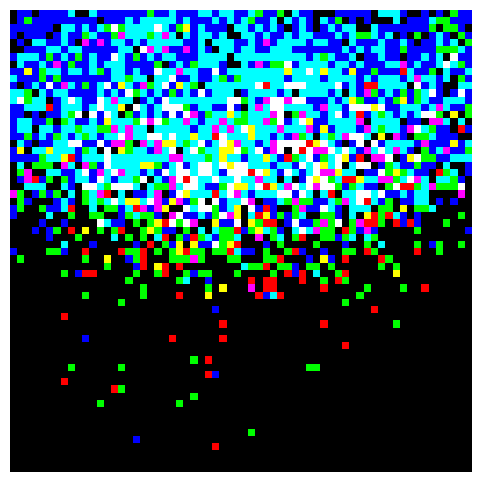

In [38]:
model = I.cpu()
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.Normalize(mean=0.5, std=0.5),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(6, 6))
images = torch.rand(1, 3, 64, 64)
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images)[0].detach().numpy().transpose((1, 2, 0)))

In [21]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()

        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=18,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          #nn.BatchNorm2d(9),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=18,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1,
                                                          padding=2),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          256,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))
        self.layer5 = torch.nn.Sequential(torch.nn.Conv2d(256,
                                                          512,
                                                          kernel_size=3,
                                                          stride=2,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(512, 1024)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(1024, 2048)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(2048, 3 * 64 * 64)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(-1, 512 * 1 * 1)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 3, 64, 64)
        x = self.ac_end(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(3 * 64 * 64, 512),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(512, 256),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(256, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCEWithLogitsLoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(300):
    for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
        noise = noises.to(device)
        I_img = I(noise).to(device)
        D_I_pred = D(I_img).to(device)
        I_loss = loss(D_I_pred, torch.ones_like(D_I_pred))
        I_optimizer.zero_grad()
        I_loss.backward()
        I_optimizer.step()

        real_inputs = real.to(device)  # (64,3,64,64)
        real_outputs = D(real_inputs).to(device)  # 64,1
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)  # 64,1
        noise = noises.to(device)  # 64,3,64,64
        fake_inputs = I(noise).to(device)  # 64,3,64,64
        fake_outputs = D(fake_inputs).to(device)  # 64,1
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0).to(device)
        targets = torch.cat((real_label, fake_label), 0).to(device)
        D_loss = loss(outputs, targets).to(device)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        #print(D_loss.item(),I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 10 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

torch.Size([64, 1])
Epoch 0 Iteration 0: discriminator_loss 0.692 generator_loss 0.343
torch.Size([64, 1])


KeyboardInterrupt: 

In [16]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.fc1 = torch.nn.Linear(320 * 320, 4096)
        self.ac1 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(4096, 2048)
        self.ac2 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(2048, 320 * 320)
        self.ac3 = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 320 * 320)
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = x.view(-1, 1, 320, 320)
        x = self.ac3(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(320 * 320, 512),
                                    nn.LeakyReLU())
        self.layer2 = nn.Sequential(nn.Linear(512, 128),
                                    nn.LeakyReLU())
        self.output = nn.Sequential(nn.Linear(128, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 320 * 320)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

In [5]:
D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(30):
    for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
        noise = noises.to(device)#torch.rand(real.shape).to(device) 
        I_img = I(noise)
        D_I_pred = D(I_img)
        I_loss = loss(D_I_pred, torch.ones_like(D_I_pred))
        I_optimizer.zero_grad()
        I_loss.backward(retain_graph=True)#retain_graph=True)
        I_optimizer.step()

        noise = noises.to(device)#torch.rand(real.shape[0], 3, 64, 64).to(device)
        real = real.to(device)
        I_img = I(noise)
        D_I_pred = D(I_img)
        D_real_pred = D(real)
        D_I_loss = loss(D_I_pred, torch.zeros_like(D_I_pred))
        D_real_loss = loss(D_real_pred, torch.ones_like(D_real_pred))
        D_loss = ((D_I_loss + D_real_loss) / 2).mean()
        D_optimizer.zero_grad()
        D_loss.backward(retain_graph=True)#)
        D_optimizer.step()
        #print(D_loss.item(), I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 10 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

0.6927472352981567 0.679868221282959
Epoch 0 Iteration 0: discriminator_loss 0.693 generator_loss 0.680
1.4779841899871826 0.25378578901290894
2.1368465423583984 0.08430838584899902
2.1694164276123047 0.07166347652673721
1.893353819847107 0.10149060934782028
1.554348349571228 0.15850237011909485
1.2889692783355713 0.23249077796936035
1.0814995765686035 0.31587332487106323
0.9345372319221497 0.4054136574268341
0.8159756660461426 0.49500223994255066
0.7279832363128662 0.5906654596328735
0.654579758644104 0.6810247898101807
0.5856088399887085 0.7720848321914673
0.5306179523468018 0.8640845417976379
0.485562264919281 0.9514492750167847
0.44732773303985596 1.0426520109176636
0.40540820360183716 1.1376644372940063
0.3715936243534088 1.2258893251419067
0.3476618528366089 1.318603515625
0.32307055592536926 1.3967125415802002
0.2923063635826111 1.4939979314804077
0.27509933710098267 1.57334303855896
0.26229578256607056 1.6564397811889648
0.2362917959690094 1.7444614171981812
0.22981706261634827

KeyboardInterrupt: 

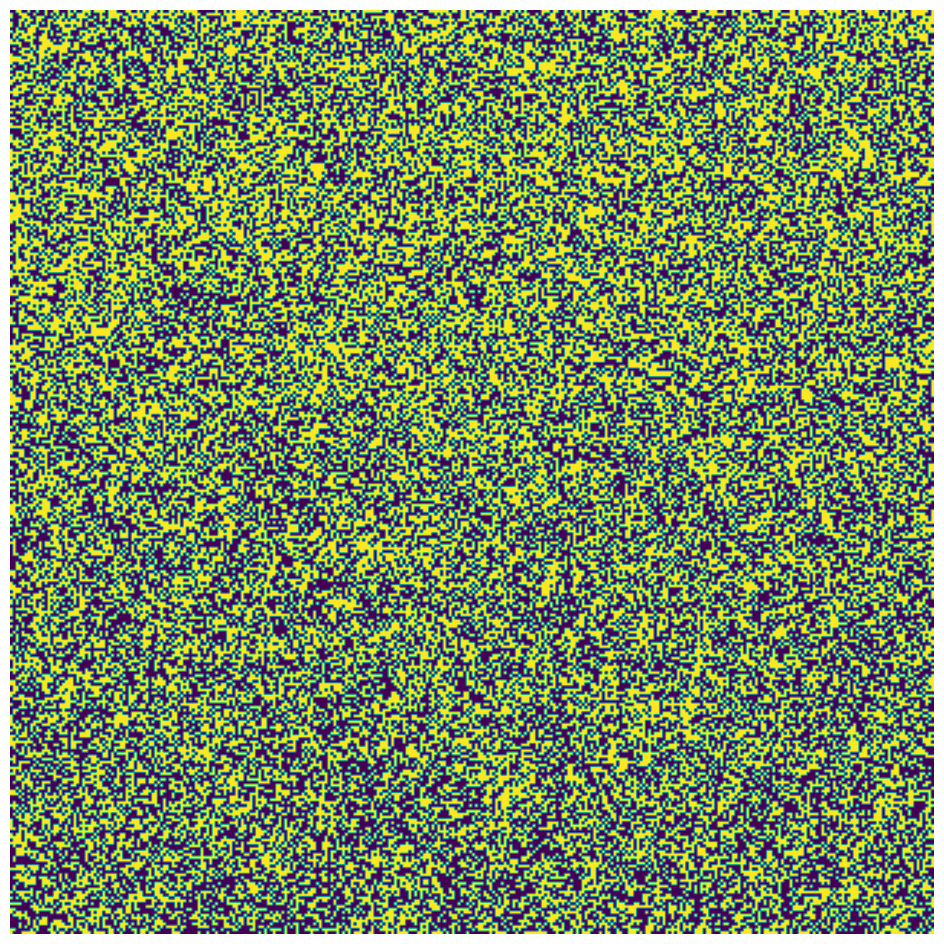

In [6]:
model = I.cpu()
transform = transforms.Compose([transforms.Resize(320),
                                transforms.CenterCrop(320),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(12, 12))
images = next(iter(X_dataloader))
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images[0][4])[0].detach().numpy().transpose((1, 2, 0)))

In [28]:
model(images[0][0])[0]

torch.Size([1, 320, 320])

In [16]:
images[0][0].size()

torch.Size([1, 320, 320])

for i, ((noises,_),(real,_)) in enumerate(zip(cycle(X_dataloader), y_dataloader)):
    for img in noises:
        ax = plt.subplot(8, 4, n + 1)
    
        ax.imshow(img.numpy().transpose((1, 2, 0)))
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        #plt.imshow(noises[0].detach().numpy().squeeze())
    

print(noise.view(-1,640*640).size())

In [0]:
x = torch.rand(3, 320, 320)
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=3,
                  kernel_size=1,
                  stride=1,
                  padding=0)
print(conv1(x).size())
x = conv1(x)
maxpool1 = nn.MaxPool2d((2, 2), stride=2)
print(maxpool1(x).size())
x = maxpool1(x)

In [0]:
x = torch.rand(1, 32, 32)
conv1 = nn.Conv2d(in_channels=1,
                  out_channels=6,
                  kernel_size=5,
                  stride=1,
                  padding=0)
print(conv1(x).size())
x = conv1(x)

maxpool1 = nn.MaxPool2d((2, 2), stride=2)
print(maxpool1(x).size())

print()

In [0]:
x = torch.rand(3, 224, 224)
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=96,
                  kernel_size=(11, 11),
                  stride=4, padding=1)
print(conv1(x).size())

In [0]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1,
                                     out_channels=9,
                                     kernel_size=,
                                     stride=1,
                                     padding=2)
        self.ac1 = torch.nn.LeakyReLU()
        self.norm1 = nn.BatchNorm2d(9)
        self.maxpool1 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)

        self.conv2 = torch.nn.Conv2d(in_channels=9,
                                     out_channels=36,
                                     kernel_size=5,
                                     stride=1,
                                     padding=2)
        self.ac2 = torch.nn.LeakyReLU()
        self.norm2 = nn.BatchNorm2d(36)
        self.maxpool2 = nn.MaxPool2d(kernel_size=4, stride=2, padding=1)

        self.conv3 = torch.nn.Conv2d(36, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.ac3 = torch.nn.LeakyReLU()
        self.norm3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(3, 2, 1)

        self.conv4 = torch.nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=1)
        self.ac4 = torch.nn.LeakyReLU()
        self.norm4 = nn.BatchNorm2d(128)
        self.maxpool4 = nn.MaxPool2d(3, 2, 1)

        self.fc1 = torch.nn.Linear(128 * 18 * 18, 4096)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(4096, 2048)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(2048, 3 * 320 * 320)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.norm1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.ac2(x)
        x = self.norm2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.ac3(x)
        x = self.norm3(x)
        x = self.maxpool3(x)
        x = self.conv4(x)
        x = self.ac4(x)
        x = self.norm4(x)
        x = self.maxpool4(x)
        x = x.view(-1, 128 * 18 * 18)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 320, 320)
        x = self.ac_end(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(320 * 320, 512),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(512, 128),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(128, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 320 * 320)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(30):
    for i, ((noises, _), (real, _)) in enumerate(zip(cycle(X_dataloader), y_dataloader)):
        real_inputs = real.to(device)
        real_outputs = D(real_inputs).to(device)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        noise = noises.to(device)
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0).to(device)
        targets = torch.cat((real_label, fake_label), 0).to(device)
        D_loss = loss(outputs, targets).to(device)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        I_loss = loss(fake_outputs, fake_targets).to(device)
        I_optimizer.zero_grad()
        I_loss.backward()
        I_optimizer.step()
        print(D_loss.item(), I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 10 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

In [28]:
x = torch.rand(3, 64, 64)
conv1 = torch.nn.Conv2d(in_channels=3,
                        out_channels=9,
                        kernel_size=3,
                        stride=1,
                        padding=1)
print(conv1(x).size())
x = conv1(x)
maxpool1 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)
print(maxpool1(x).size())
x = maxpool1(x)
conv2 = torch.nn.Conv2d(in_channels=9,
                        out_channels=36,
                        kernel_size=5,
                        stride=1,
                        padding=2)
print(conv2(x).size())
x = conv2(x)
maxpool2 = nn.MaxPool2d(kernel_size=4, stride=2, padding=1)
print(maxpool2(x).size())
x = maxpool2(x)
conv3 = torch.nn.Conv2d(36, 128, kernel_size=(3, 3), stride=1, padding=1)
print(conv3(x).size())
x = conv3(x)
maxpool3 = nn.MaxPool2d(3, 2, 1)
print(maxpool3(x).size())
x = maxpool3(x)
conv4 = torch.nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=1)
print(conv4(x).size())
x = conv4(x)
maxpool4 = nn.MaxPool2d(3, 2, 1)
print(maxpool4(x).size())
conv5 = torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=0)
print(conv5(x).size())
x = conv5(x)
maxpool5 = nn.MaxPool2d(3, 2, 1)
print(maxpool5(x).size())

torch.Size([9, 64, 64])
torch.Size([9, 32, 32])
torch.Size([36, 32, 32])
torch.Size([36, 16, 16])
torch.Size([128, 16, 16])
torch.Size([128, 8, 8])
torch.Size([128, 4, 4])
torch.Size([128, 2, 2])
torch.Size([256, 2, 2])
torch.Size([256, 1, 1])


In [6]:
layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                             out_channels=9,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             torch.nn.Conv2d(in_channels=9,
                                             out_channels=9,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             #nn.BatchNorm2d(9),
                             nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=9,
                                             out_channels=36,
                                             kernel_size=5,
                                             stride=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(36),
                             nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                             128,
                                             kernel_size=(3, 3),
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(128),
                             nn.MaxPool2d(3, 2, 1))

layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                             256,
                                             kernel_size=7,
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(128),
                             nn.MaxPool2d(3, 2, 1))
x = torch.rand(1, 3, 64, 64)
print(layer1(x).size())
x = layer1(x)
print(layer2(x).size())
x = layer2(x)
print(layer3(x).size())
x = layer3(x)
print(layer4(x).size())

torch.Size([1, 9, 32, 32])
torch.Size([1, 36, 14, 14])
torch.Size([1, 128, 7, 7])
torch.Size([1, 256, 2, 2])


In [0]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          #nn.BatchNorm2d(9),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=9,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=(3, 3),
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          256,
                                                          kernel_size=7,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(256, 512)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(512, 1024)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(1024, 3 * 64 * 64)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(-1, 256 * 1 * 1)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 3, 64, 64)
        x = self.ac_end(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(3 * 64 * 64, 256),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(256, 64),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(64, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(30):
    for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
        real_inputs = real.to(device)
        real_outputs = D(real_inputs).to(device)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        noise = noises.to(device)
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0).to(device)
        targets = torch.cat((real_label, fake_label), 0).to(device)
        D_loss = loss(outputs, targets).to(device)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        I_loss = loss(fake_outputs, fake_targets).to(device)
        I_optimizer.zero_grad()
        I_loss.backward()
        I_optimizer.step()
        print(D_loss.item(), I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 3 == 0:
        torch.save(I, './epochs/Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

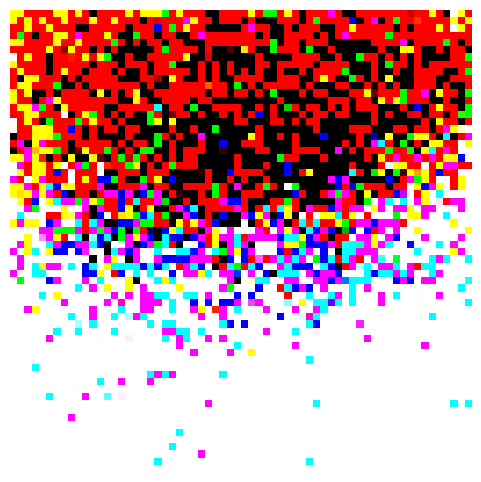

In [50]:
model = I.cpu()
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(6, 6))
images = torch.rand(1, 3, 64, 64)
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images)[0].detach().numpy().transpose((1, 2, 0)))

In [31]:
layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                             out_channels=9,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             torch.nn.Conv2d(in_channels=9,
                                             out_channels=18,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             #nn.BatchNorm2d(9),
                             nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=18,
                                             out_channels=36,
                                             kernel_size=5,
                                             stride=1,
                                             padding=2),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(36),
                             nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                             128,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(128),
                             nn.MaxPool2d(3, 2, 1))

layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                             256,
                                             kernel_size=3,
                                             stride=1,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(128),
                             nn.MaxPool2d(3, 2, 1))
layer5 = torch.nn.Sequential(torch.nn.Conv2d(256,
                                             512,
                                             kernel_size=3,
                                             stride=2,
                                             padding=1),
                             torch.nn.LeakyReLU(),
                             #nn.BatchNorm2d(128),
                             nn.MaxPool2d(3, 2, 1))
x = torch.rand(1, 3, 64, 64)
print(layer1(x).size())
print(layer2(layer1(x)).size())
print(layer3(layer2(layer1(x))).size())
print(layer4(layer3(layer2(layer1(x)))).size())
print(layer5(layer4(layer3(layer2(layer1(x))))).size())

torch.Size([1, 18, 32, 32])
torch.Size([1, 36, 16, 16])
torch.Size([1, 128, 8, 8])
torch.Size([1, 256, 4, 4])
torch.Size([1, 512, 1, 1])


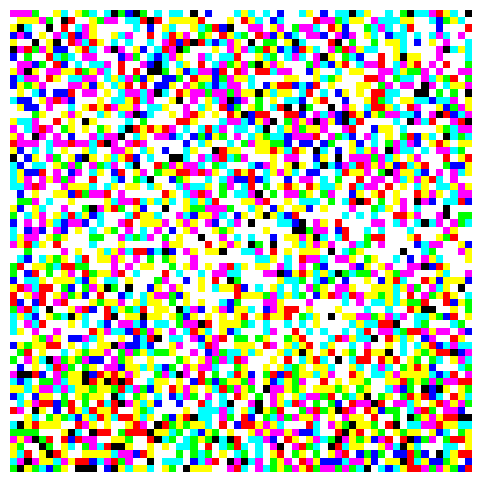

In [15]:
model = I.cpu()
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(6, 6))
images = torch.rand(1, 3, 64, 64)
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images)[0].detach().numpy().transpose((1, 2, 0)))

In [16]:
real

tensor([[[[0.9608, 0.9529, 0.9608,  ..., 0.6275, 0.6353, 0.6392],
          [0.9569, 0.9451, 0.9451,  ..., 0.6235, 0.6314, 0.6353],
          [0.9412, 0.9333, 0.9333,  ..., 0.6196, 0.6275, 0.6353],
          ...,
          [0.8039, 0.8392, 0.8745,  ..., 0.5176, 0.5098, 0.4863],
          [0.9804, 0.9647, 0.9529,  ..., 0.5686, 0.5569, 0.4980],
          [0.7843, 0.7098, 0.6667,  ..., 0.5020, 0.5059, 0.4745]],

         [[0.9608, 0.9529, 0.9569,  ..., 0.7333, 0.7412, 0.7451],
          [0.9569, 0.9451, 0.9451,  ..., 0.7294, 0.7373, 0.7412],
          [0.9412, 0.9333, 0.9333,  ..., 0.7255, 0.7333, 0.7412],
          ...,
          [0.7686, 0.8039, 0.8353,  ..., 0.5294, 0.5176, 0.5373],
          [0.9333, 0.9255, 0.9059,  ..., 0.5686, 0.5647, 0.5569],
          [0.7216, 0.6706, 0.6275,  ..., 0.5490, 0.5608, 0.5373]],

         [[0.9529, 0.9451, 0.9490,  ..., 0.8510, 0.8588, 0.8588],
          [0.9490, 0.9373, 0.9373,  ..., 0.8471, 0.8510, 0.8588],
          [0.9333, 0.9255, 0.9255,  ..., 0

In [17]:
I(noise)

tensor([[[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 3.0152e-32],
          [2.9070e-09, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00]],

         [[1.0000e+00, 5.7308e-21, 0.0000e+00,  ..., 1.0000e+00,
           0.0000e+00, 1.0000e+00],
          [1.0000e+00, 5.4532e-35, 6.0366e-37,  ..., 1.5352e-37,
           3.5731e-38, 6.6293e-26],
          [0.0000e+00, 1.1733e-25, 1.0000e+00,  ..., 1.0000e+00,
           5.5273e-22, 1.0000e+00],
          ...,
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000

In [17]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          #nn.BatchNorm2d(9),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=9,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=(3, 3),
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          128,
                                                          kernel_size=7,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(256, 512)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(512, 1024)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(1024, 3 * 64 * 64)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(-1, 256 * 1 * 1)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 3, 64, 64)
        x = self.ac_end(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(3 * 64 * 64, 512),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(512, 128),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(128, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(300):
    for i, (real, _) in enumerate(y_dataloader):
        real_inputs = real.to(device)
        real_outputs = D(real_inputs).to(device)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        noise = torch.rand(real_inputs.shape[0], 3, 64, 64).to(device)
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0).to(device)
        targets = torch.cat((real_label, fake_label), 0).to(device)
        D_loss = loss(outputs, targets).to(device)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        I_loss = loss(fake_outputs, fake_targets).to(device)
        I_optimizer.zero_grad()
        I_loss.backward()
        I_optimizer.step()
        print(D_loss.item(), I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 2 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

Epoch 0 Iteration 0: discriminator_loss 0.683 generator_loss 1.186
Epoch 1 Iteration 0: discriminator_loss 0.000 generator_loss 10.272
Epoch 2 Iteration 0: discriminator_loss 0.000 generator_loss 11.154
Epoch 3 Iteration 0: discriminator_loss 66.667 generator_loss 0.000
Epoch 4 Iteration 0: discriminator_loss 66.667 generator_loss 0.000



KeyboardInterrupt



In [13]:
import torch
from torch import nn
from torchvision import datasets, transforms
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
import torch

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")
print(f"How many devices {torch.cuda.device_count()}")

transform = transforms.Compose([transforms.Resize(320),
                                transforms.CenterCrop(320),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
y = datasets.ImageFolder('./datasets/y/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=32,
                                           shuffle=False)
y_dataloader = torch.utils.data.DataLoader(y,
                                           batch_size=32,
                                           shuffle=False)
X_batched_data = iter(X_dataloader)
y_batched_data = iter(y_dataloader)

True
Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device:0
Name of current CUDA device: NVIDIA GeForce RTX 4060
How many devices 1


In [14]:
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=1,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=9,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=(3, 3),
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          128,
                                                          kernel_size=7,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(128 * 18 * 18, 4096)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(4096, 2048)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(2048, 320 * 320)
        self.ac_end = torch.nn.Tanh()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(-1, 128 * 18 * 18)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 320, 320)
        x = self.ac_end(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(nn.Linear(320 * 320, 4096),
                                    nn.LeakyReLU(), )
        # nn.BatchNorm1d(512))
        self.layer2 = nn.Sequential(nn.Linear(4096, 2048),
                                    nn.LeakyReLU(), )
        #nn.BatchNorm1d(128))
        self.output = nn.Sequential(nn.Linear(2048, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 320 * 320)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x


D = Discriminator().to(device)
I = Improver().to(device)
loss = nn.BCELoss()

D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)  #torch.optim.SGD(D.parameters(), lr=0.003)
I_optimizer = torch.optim.Adam(I.parameters(), lr=0.0003)
for e in range(30):
    for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):
        real_inputs = real.to(device)
        real_outputs = D(real_inputs).to(device)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        noise = noises.to(device)
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        outputs = torch.cat((real_outputs, fake_outputs), 0).to(device)
        targets = torch.cat((real_label, fake_label), 0).to(device)
        D_loss = loss(outputs, targets).to(device)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        fake_inputs = I(noise).to(device)
        fake_outputs = D(fake_inputs).to(device)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        I_loss = loss(fake_outputs, fake_targets).to(device)
        I_optimizer.zero_grad()
        I_loss.backward()
        I_optimizer.step()
        print(D_loss.item(), I_loss.item())
        if i % 100 == 0 or i == len(X_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(e, i, D_loss.item(),
                                                                                                  I_loss.item()))
    if (e + 1) % 10 == 0:
        torch.save(I, 'Generator_epoch_{}.pth'.format(e))
        print('Model saved.')

0.6832115650177002 0.8173547983169556
Epoch 0 Iteration 0: discriminator_loss 0.683 generator_loss 0.817
0.7116742730140686 0.9906779527664185
4.72575044631958 6.280909061431885
0.11417340487241745 3.461778163909912
16.500904083251953 1.664196252822876
0.19026580452919006 0.8386830687522888
6.824212074279785 4.980727226211457e-06
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0
50.0 0.0


KeyboardInterrupt: 

In [33]:
for ax in axes:
    print(type(ax[0]))

<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>


In [37]:
axes[0]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
for i, ((noises, _), (real, _)) in enumerate(zip(X_dataloader, y_dataloader)):


ValueError: axes don't match array

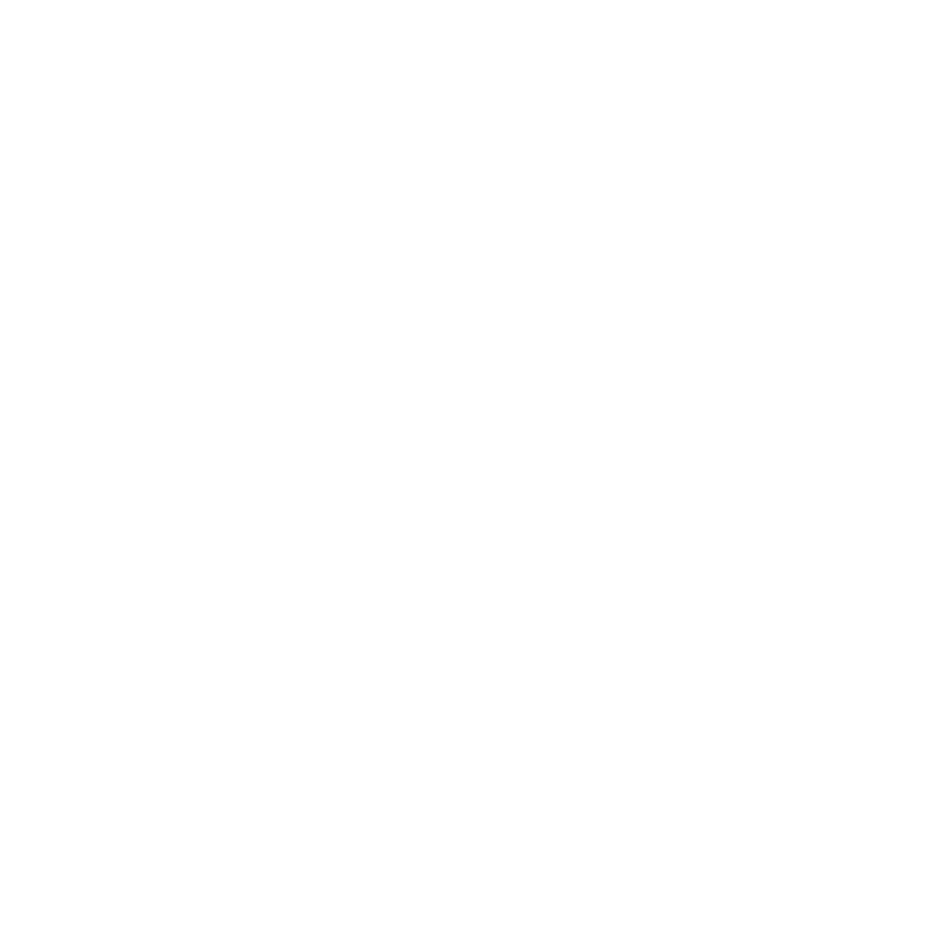

In [34]:
model = I.cpu()
transform = transforms.Compose([transforms.Resize(320),
                                transforms.CenterCrop(320),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(12, 12))
images = next(iter(X_dataloader))
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images[0][1]).detach().numpy().transpose((1, 2, 0)))

In [ ]:
images[0]

In [ ]:
model

In [ ]:
.